/tmp/ipykernel_29753/2465619032.py:30: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  'year_of_shock': pct_changes_1970_2020.idxmin(axis=1),


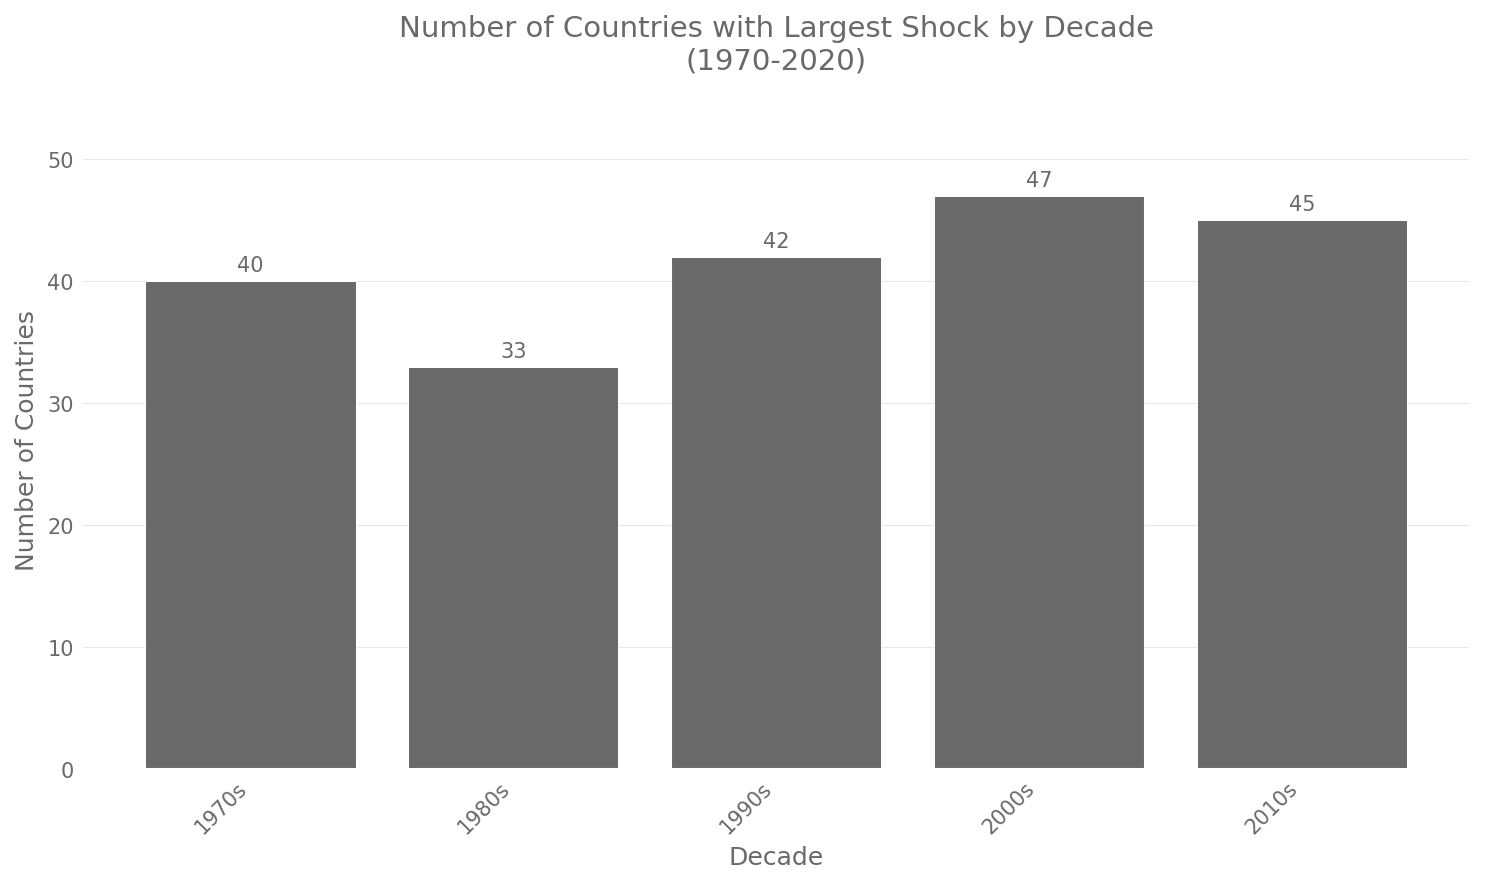

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Set up ALLFED plotting style
plt.style.use(
    "https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle"
)

# Import calculate_changes_savgol
from src.calculate_food_shocks import calculate_changes_savgol

# Load the original calorie data
data = pd.read_csv("../results/calories_by_countries.csv", index_col=0)

# Convert column names to integers for easier filtering
data.columns = data.columns.astype(int)

# Process 1970-2020 data
years_1970_2020 = [col for col in data.columns if 1970 <= col <= 2020]
cropped_data_1970_2020 = data[years_1970_2020]

# Calculate percentage changes for 1970-2020
pct_changes_1970_2020 = calculate_changes_savgol(cropped_data_1970_2020, window_length=15, polyorder=3)

# Find the largest shock for each country
largest_shocks_1970_2020 = pd.DataFrame({
    'country': pct_changes_1970_2020.index,
    'year_of_shock': pct_changes_1970_2020.idxmin(axis=1),
    'largest_food_shock': pct_changes_1970_2020.min(axis=1)
})

# Remove any countries with no valid shocks
largest_shocks_1970_2020 = largest_shocks_1970_2020.dropna()

# Extract decade from year
largest_shocks_1970_2020["decade"] = largest_shocks_1970_2020["year_of_shock"].apply(
    lambda x: f"{int(x//10)*10}s" if x < 2020 else "2020s"
)

# Count countries per decade for 1970-2020
decade_counts_1970_2020 = largest_shocks_1970_2020["decade"].value_counts().sort_index()

# Create first plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(
    decade_counts_1970_2020.index,
    decade_counts_1970_2020.values,
    color='dimgrey',
    edgecolor='white',
    linewidth=0.5
)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.5,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

ax.set_xlabel("Decade", fontsize=12)
ax.set_ylabel("Number of Countries", fontsize=12)
ax.set_title("Number of Countries with Largest Shock by Decade\n(1970-2020)", fontsize=14, pad=20)
plt.xticks(rotation=45, ha="right")
ax.grid(True, axis="y", alpha=0.3)
ax.xaxis.grid(False)
ax.set_axisbelow(True)
ax.set_ylim(0, max(decade_counts_1970_2020.values) * 1.15)
plt.tight_layout()
plt.show()